<h1>Accessing <a href="https://www.ebi.ac.uk/chembldb/index.php">ChEMBL</a> Web Service from BioServices</h1>

<p>This notebook illustrates some of the ChEMBL web services using BioServices chembl module. </p>


In [1]:
from bioservices import ChEMBL
%pylab inline
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] 
     

Populating the interactive namespace from numpy and matplotlib


### Note: We are going to play with the ChEMBL service here. We will also use Pandas and Matplotlib packages, that are not part of BioServices and not installed with bioservices. 

In [2]:
# let us see if pandas is installed indeed
import pandas as pd

In [3]:
# First, let us create an instance
s = ChEMBL()

# Compounds related

The first thing is get familiar with the inputs that are expected by most of the functions, which is a valid identifier. ChEMBL identifier are of the form 'CHEMBL' + number e.g, CHEMBL2. Let us see the output:


In [4]:
s.get_compounds_by_chemblId('CHEMBL2')

{u'compound': {u'acdBasicPka': 6.52,
  u'acdLogd': 2.09,
  u'acdLogp': 2.14,
  u'alogp': 2.11,
  u'chemblId': u'CHEMBL2',
  u'knownDrug': u'Yes',
  u'medChemFriendly': u'Yes',
  u'molecularFormula': u'C19H21N5O4',
  u'molecularWeight': 383.4,
  u'numRo5Violations': 0,
  u'passesRuleOfThree': u'No',
  u'preferredCompoundName': u'PRAZOSIN',
  u'rotatableBonds': 4,
  u'smiles': u'COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)c4occc4',
  u'species': u'NEUTRAL',
  u'stdInChiKey': u'IENZQIKPVFGBNW-UHFFFAOYSA-N',
  u'synonyms': u'CP-12299,Prazosin'}}

This is a dictionary with information about that particular ChEMBL identifier.

We can call the previous method with a list of identifiers instead of just one identifier. We can do that in a systematic way. One issue is that some identifiers do not exists (e.g., CHEMBL7).In that particular case, the number 404 is returned. For instance, here let us try to fetch the first 1000 identifiers.

In [7]:
res = s.get_compounds_by_chemblId(['CHEMBL%s' % i for i in range(0,1000)])
len(res)

1000

/home/cokelaer/Work/virtualenv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


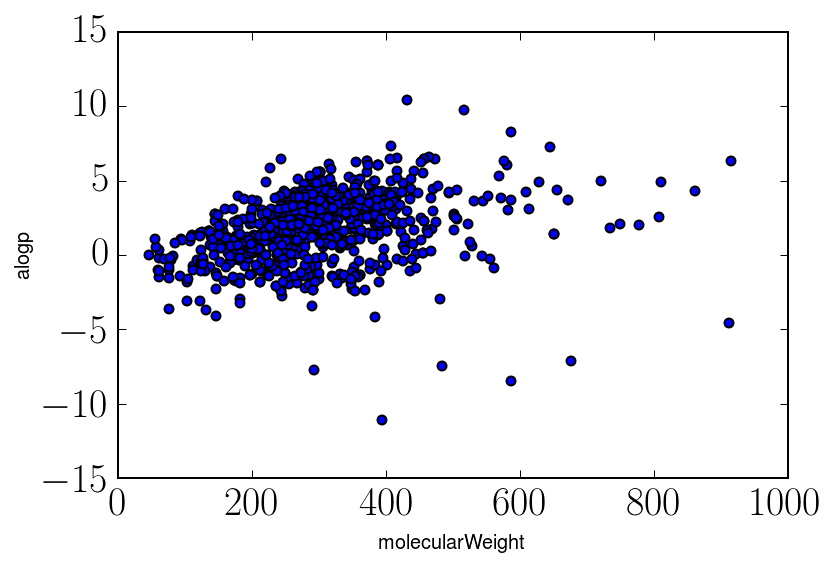

In [21]:
# here this look a bit esoteric but what we do if to remove the 404 numbers
# and transform the data into a nice dataframe for easy plotting of some 
# relevant information 
data = [dict(this) for this in res if this!=404]
data = [x['compound'] for x in data]
df = pd.DataFrame(
    data, index=[this['chemblId'] for this in data])

df.plot(x='molecularWeight', y='alogp', marker='o', kind='scatter', 
        fontsize=20)


Another nice feature from ChEMBL service is to be able to fetch the image
representing the formula of the identifier. If view is True, the image is shown in your default viewer. If set to False, you can then read the image yourself (here below with matplotlib) using the output

In [22]:
res = s.get_image_of_compounds_by_chemblId('CHEMBL192', view=False)

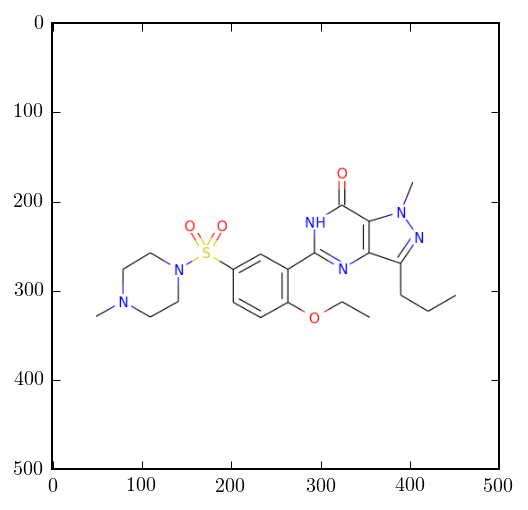

In [23]:
# images are saved into local files
imshow(imread(res['filenames'][0]))

In [24]:
res = s.get_image_of_compounds_by_chemblId('CHEMBL2', view=False, save=False)

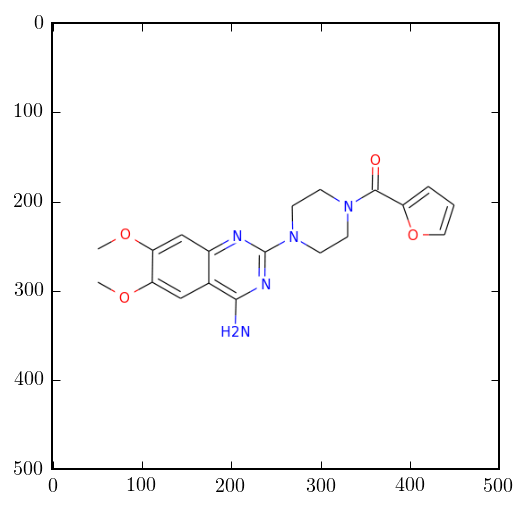

In [25]:
# alternatively, you may not want to save images into files. 
# If so, we need to read the binary, that is saved in the 'images' key
import StringIO
imshow(imread(StringIO.StringIO(res['images'][0])))

More functions related to compounds can be found here

http://pythonhosted.org//bioservices/references.html#bioservices.chembl.ChEMBL

# Target related

In [26]:
res = s.get_all_targets()

In [27]:
df = pd.DataFrame(res)

In [31]:
df.targetType.value_counts()

SINGLE PROTEIN                  6018
ORGANISM                        2136
CELL-LINE                       1630
PROTEIN COMPLEX                  261
TISSUE                           242
PROTEIN FAMILY                   217
SELECTIVITY GROUP                 97
PROTEIN COMPLEX GROUP             44
NUCLEIC-ACID                      29
PROTEIN-PROTEIN INTERACTION       21
SMALL MOLECULE                    18
UNKNOWN                           18
SUBCELLULAR                        9
METAL                              8
OLIGOSACCHARIDE                    6
PROTEIN NUCLEIC-ACID COMPLEX       6
MACROMOLECULE                      5
CHIMERIC PROTEIN                   4
PHENOTYPE                          2
UNCHECKED                          1
NO TARGET                          1
ADMET                              1
Name: targetType, dtype: int64

Now, let us look at the targetType column and plot an histogram counting the number of
target types

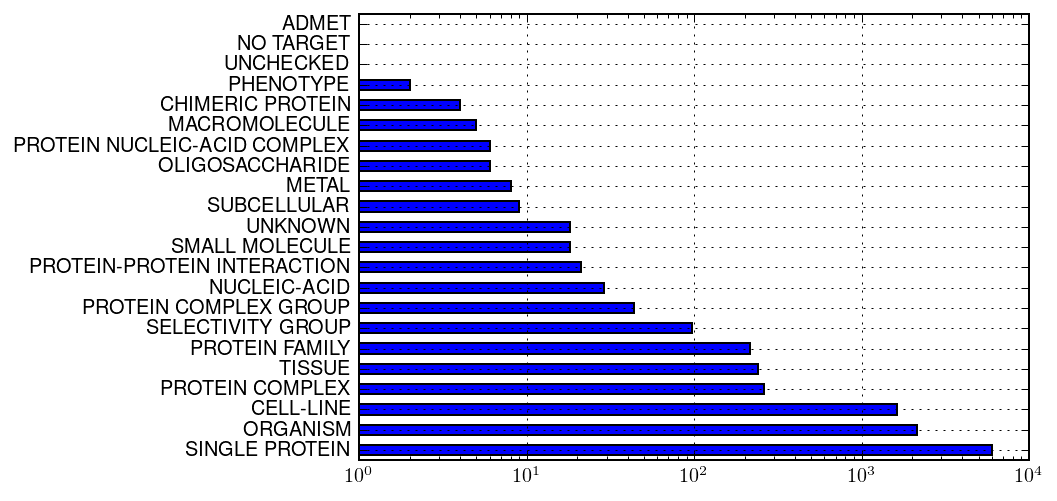

In [35]:
df.targetType.value_counts().plot(kind="barh", logx=True, grid=True)

There are more functions related to targets. Please see 

http://pythonhosted.org//bioservices/references.html#bioservices.chembl.ChEMBL


# Assays related

In [36]:
s._assays_example

'CHEMBL1217643'

In [37]:
s.get_assays_bioactivities(s._assays_example)

{u'bioactivities': [{u'activity_comment': u'Unspecified',
   u'assay_chemblid': u'CHEMBL1217643',
   u'assay_description': u'Inhibition of human hERG',
   u'assay_type': u'B',
   u'bioactivity_type': u'IC50',
   u'ingredient_cmpd_chemblid': u'CHEMBL1214402',
   u'name_in_reference': u'26',
   u'operator': u'=',
   u'organism': u'Homo sapiens',
   u'parent_cmpd_chemblid': u'CHEMBL1214402',
   u'reference': u'Bioorg. Med. Chem. Lett., (2010) 20:15:4359',
   u'target_chemblid': u'CHEMBL240',
   u'target_confidence': 9,
   u'target_name': u'HERG',
   u'units': u'nM',
   u'value': u'5900'}]}